# Random Forest (Regression)
This document is applying the Random Forest model for regression on the `train` and `test` datasets. It attempts to predict the **time** when the next event will occur.

The model works by predicting the relative amount of seconds. This is the amount of seconds it is predicted to take from the startTime of the current event to the next event.

In [1]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error
from random_forest import RandomForestRegressor
from IPython.display import display


# Config variables
Initializing variables for configuration and tuning, defining the amount of samples to take from the dataset, the amount of trees in the forest, the datasets, etc.

In [2]:
# Config variables
training_data_path = '../datasets/bpi_2012_train_eng.csv'
testing_data_path = '../datasets/bpi_2012_test_eng.csv'

n_samples = 2000
n_trees = 5
sample_split = 5
max_depth = 5


# Loading the data

In [3]:
# Loading and splitting the datasets
df_train = pd.read_csv(training_data_path)
df_train = df_train.set_index('event_index').drop('Unnamed: 0', axis=1)

df_test = pd.read_csv(testing_data_path)
df_test = df_test.set_index('event_index').drop('Unnamed: 0', axis=1)


In [4]:
# Selecting columns and rows
df_train = df_train.drop(['nextEvent', 'nextEventTime'], axis=1)[0:n_samples]
df_test = df_test.drop(['nextEvent', 'nextEventTime'], axis=1)[0:n_samples]


In [5]:
df_train = df_train.dropna()
df_test = df_test.dropna()

df_train


,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,nextEventTimeRel,startTimeRel,indexInCase
event_index,,,,,,,,,,
48289,183459,O_SENT_BACK,2011/11/25 12:20:28.697,2011/11/25 12:20:28.697,40000,2011/11/09 14:15:46.029,10789,347534.0,1375482,15
101208,195392,A_SUBMITTED,2011/12/23 17:09:57.692,2011/12/23 17:09:57.692,5000,2011/12/23 17:09:57.692,112,8205.0,0,0
51064,184171,A_PARTLYSUBMITTED,2011/11/10 17:37:46.609,2011/11/10 17:37:46.609,5000,2011/11/10 17:37:46.407,112,0.0,0,1
77689,190543,W_Nabellen offertes,2011/12/12 12:06:47.881,2011/12/12 12:07:58.369,5500,2011/12/01 17:11:34.989,11003,6659.0,932113,12
102277,195609,A_PARTLYSUBMITTED,2011/12/26 12:52:21.854,2011/12/26 12:52:21.854,32500,2011/12/26 12:52:21.741,112,35.0,0,1
...,...,...,...,...,...,...,...,...,...,...
54959,185099,A_SUBMITTED,2011/11/14 06:55:54.672,2011/11/14 06:55:54.672,2750,2011/11/14 06:55:54.665,112,5.0,0,0
17117,177077,O_SELECTED,2011/11/05 14:39:08.075,2011/11/05 14:39:08.075,30000,2011/10/14 20:31:04.229,10912,1.0,1879684,32
48658,183504,W_Valideren aanvraag,2011/11/18 10:20:25.797,2011/11/18 10:21:04.607,48287,2011/11/09 15:51:01.164,10972,30.0,757764,11


In [6]:
# Starting time
start_time = time.time()

X_train = df_train.drop(['nextEventTimeRel'], axis=1).values
Y_train = df_train['nextEventTimeRel'].values.reshape(-1, 1)
X_test = df_test.drop(['nextEventTimeRel'], axis=1).values
Y_test = df_test['nextEventTimeRel'].values.reshape(-1, 1)

# Constructing and fitting the model
regressor = RandomForestRegressor(n_trees=n_trees, min_samples_split=sample_split, max_depth=max_depth)
regressor.fit(X_train, Y_train)

# Predicting the values of our test dataset
Y_pred = regressor.predict(X_test)
mse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Retrieving the accuracy of the model
print(f'MSE score: {mse}')

# Ending time
end_time = time.time()
print(f'\r\nThe execution of Random Forest took {round(end_time - start_time)} seconds')



0: Building tree...
0: Sampling complete!
0: Training complete!
74615.66961325967

1: Building tree...
1: Sampling complete!
1: Training complete!
85960.49447513813

2: Building tree...
2: Sampling complete!
2: Training complete!
72910.85138121547

3: Building tree...
3: Sampling complete!
3: Training complete!
66660.91491712707

4: Building tree...
4: Sampling complete!
4: Training complete!
83891.07348066298

The mean calculation concluded:
0    76807.800773
1    76807.800773
2    76807.800773
3    76807.800773
4    76807.800773
dtype: float64
MSE score: 393936.495922647

The execution of Random Forest took 59 seconds


# Analysis of model accuracy

Error percentage of full testing dataset


,error_percentage
count,1.623000e+03
mean,1.365763e+08
std,3.429134e+08
min,-9.700000e+01
25%,-5.250000e+01
50%,2.520000e+03
75%,2.020260e+05
max,1.000000e+09


Error percentage capped at 5000, for plotting purposes


,error_percentage
count,866.000000
mean,384.448037
std,954.865259
min,-97.000000
25%,-85.000000
50%,-43.500000
75%,304.500000
max,4927.000000


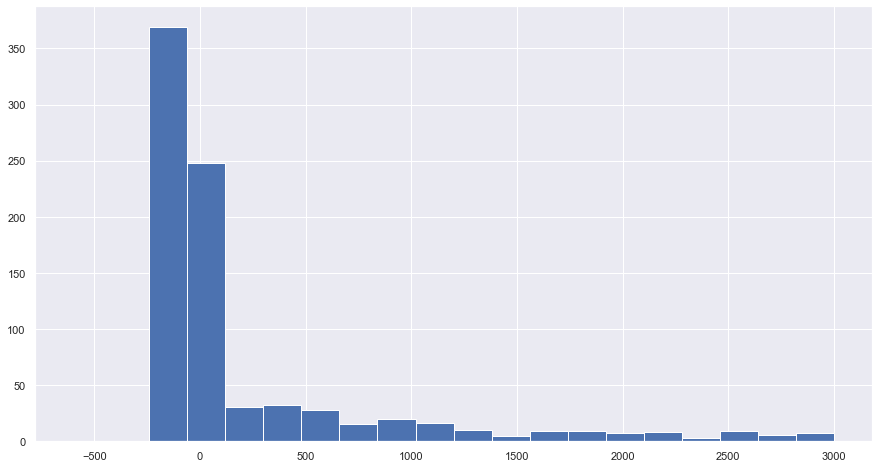

In [7]:
# Turn predictions and true values into a dataframe
df_analysis = pd.DataFrame(Y_test)
df_analysis = df_analysis.rename(columns={0: 'true'})
df_analysis['pred'] = Y_pred

# Calculate the error percentage, replacing infinity with 1e+09
df_analysis['error_percentage'] = (df_analysis['pred'] - df_analysis['true']) / df_analysis['true'] * 100
inf_mask = np.isinf(pd.DataFrame(df_analysis['error_percentage']))['error_percentage'] == True
df_analysis.loc[inf_mask, 'error_percentage'] = 1000000000

# Round the percentages to integers
df_analysis['error_percentage'] = round(df_analysis['error_percentage']).astype(int)

# Select a subset with error percentage below 5000, for plotting purposes
df_analysis_plot = df_analysis[df_analysis['error_percentage'] < 5000]

# Plot styling
import seaborn as sns
sns.set(rc = {'figure.figsize':(25,15)})

fig = plt.figure(figsize=(15, 8))
plt.hist(df_analysis_plot['error_percentage'], bins=20, range=[-600, 3000])
#plt.savefig('hist_rfr.png')

print("Error percentage of full testing dataset")
display(df_analysis[['error_percentage']].describe())
print("Error percentage capped at 5000, for plotting purposes")
df_analysis_plot[['error_percentage']].describe()


# Post-modelling EDA

So, the model's predictions seem to be horribly wrong. What does our data actually look like? Why is it so far off?

<AxesSubplot:xlabel='startTimeRel', ylabel='nextEventTimeRel'>

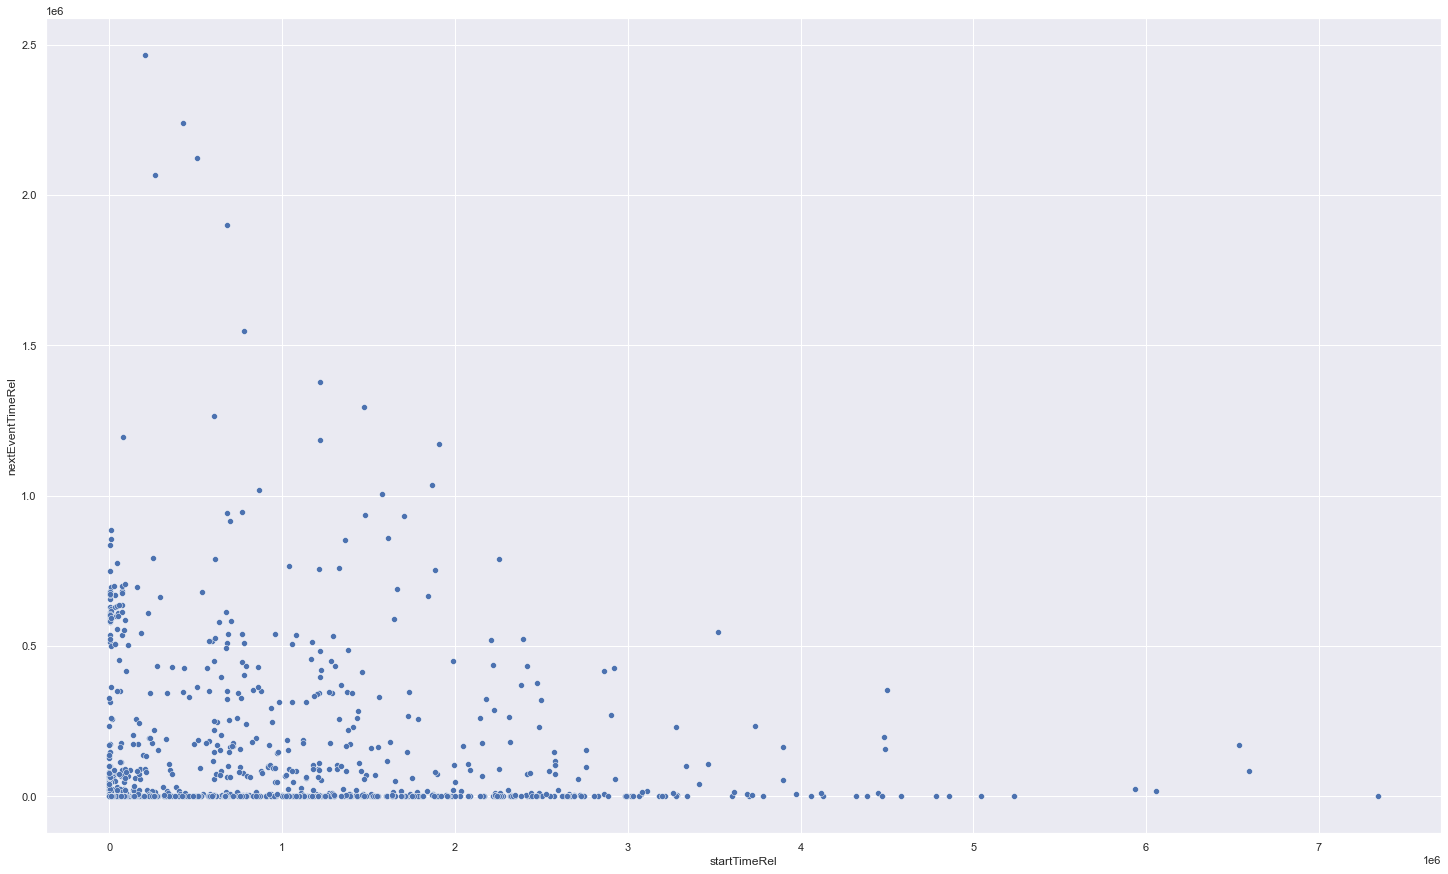

In [8]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(25,15)})
sns.scatterplot(data=df_train, x='startTimeRel', y='nextEventTimeRel')


# Applying libraries

Applying the SKLearn library to hopefully circumvent the issue of weird tree generation.

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib as plt

rfc = RandomForestRegressor(random_state=42)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

ValueError: could not convert string to float: 'O_SENT_BACK'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, rfc_pred)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
